# Plot New ECS/TCR Fig from Tables 7.14 and 7.15

Piers 5 March 
Post-edit by Chris 9 March

Theme Song: It's Not True Rufus, Don't Listen To The Hat<br>
Artist: TTNG<br>
Album: This Town Needs Guns<br>
Released: 2008

In [1]:
from __future__ import division
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as pl
import pandas as pd
from matplotlib import gridspec, rc
from matplotlib.lines import Line2D
from netCDF4 import Dataset
import warnings

In [2]:
#pl.rcParams.keys()

In [3]:
#%matplotlib inline

pl.rcParams['figure.figsize'] = (18/2.54, 6/2.54)
pl.rcParams['font.size'] = 9
pl.rcParams['figure.dpi'] = 150
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['xtick.direction'] = 'out'
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['ytick.major.left'] = False
pl.rcParams['ytick.major.right'] = True
pl.rcParams['ytick.labelright'] = True
pl.rcParams['ytick.major.size'] = 0
pl.rcParams['ytick.major.pad'] = -56
pl.rcParams['xtick.top'] = False

In [4]:
# from the FGD-approved "dark" palette
colors_bar = {
    'red1': '#dd512e',
    'blue1': '#2134db',
    'cyan': '#35a5c5',
    'red2': '#aa1818',
    'blue2': '#082e72',
    'orange': '#ec9c2e',
    'green': '#327f51',
    'purple': '#8036a8',
    'grey': '#c0c0c0',
    'aerosol': '#66665f'
}

# as above with 30% added to lightness
colors_bar2 = {
    'red': '#f2bdb0',
    'blue1': '#a2aaf1',
    'cyan': '#aadbe9',
    'red2': '#eb7070',
    'blue2': '#246ff0',
    'orange': '#f8deb9',
    'green': '#7ecd9e',
    'purple': '#b174d2',
    'grey': '#e0e0e0',
    'aerosol': '#9b9b92'
}

Equilibrium Climate Sensitivity (ECS)	Central value	Likely 	Very likely 	Extremely likely
Process understanding (7.5.1)	3.4 °C	2.5–5.1 °C	2.1–7.7 °C

Warming over instrumental record (7.5.2)	
2.5–3.5 °C	
> 2.2 °C	 
> 1.8 °C	> 1.6 °C
Paleoclimates (7.5.3)	3.3-3.4 °C	< 4.5 °C	> 1.5 °C	< 8 °C
Emergent constraints (7.5.4)	2.4–3.3 °C		1.5–5.0 °C	
Combined assessment	3 °C	2.5–4.0 °C	2.0–5.0 °C	
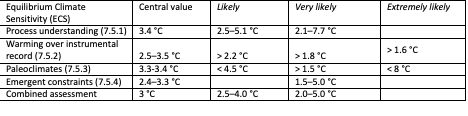

In [5]:
ecs_process=[3.4,3.4,2.5,5.1,2.1,7.7,-999,-999]
ecs_hist=[2.5,3.5,2.2,-999,1.8,-999,1.6,-999]
ecs_paleo=[3.3,3.4,-999,4.5,1.5,-999,-999,8]
ecs_ec=[2.4,3.3,-999,-999,1.5,5,-999,-999]
ecs_combined=[3,3,2.5,4.0,2,5,-999,-999]

In [6]:
#THese data from Sophie 
 #from  Schlund et al. Earth Syst. Dynam., 11, 1233–1258, 2020 https://doi.org/10.5194/esd-11-1233-2020

cecs=pd.read_excel('../data_input/Schlund_et_al_2020/ecs_for_faq.xlsx')
cmip6_ecs=np.array(cecs.ECS)
ctcr=pd.read_excel('../data_input/Schlund_et_al_2020/tcr_for_faq.xlsx')
cmip6_tcr=np.array(ctcr.TCR)

In [7]:

ne=len(cmip6_ecs)
nt=len(cmip6_tcr)
ycmip6e=np.zeros(ne)
ycmip6t=np.zeros(nt)
ycmip6e[:]=1
ycmip6t[:]=1


Transient Climate Response (TCR)	Central value	Likely range	Very likely range
Process understanding (7.5.1)	2.0 °C 	1.5–2.5 °C	1.3–2.9 °C

Warming over instrumental record (7.5.2)	1.9 °C	1.5–2.3 °C	1.3–2.7 °C
Emergent constraints (7.5.4)	1.7 °C		1.1–2.3 °C
Combined assessment	1.8 °C	1.4–2.2 °C	1.2–2.4 °C

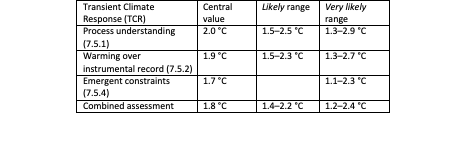

In [8]:
tcr_process=[2,2,1.5,2.5,1.3,2.9]
tcr_hist=[1.9,1.9,1.5,2.3,1.3,2.7]
tcr_ec=[1.7,1.7,-999,-999,1.1,2.3]
tcr_combined=[1.8,1.8,1.4,2.2,1.2,2.4]

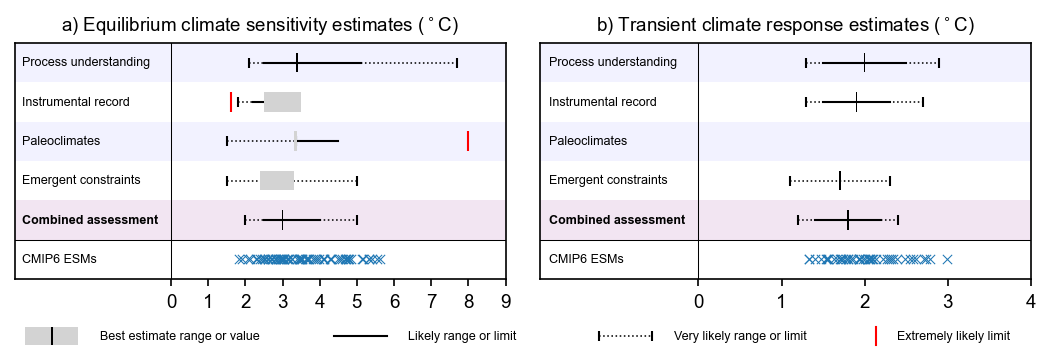

In [36]:
fig, ax = pl.subplots(1,2)
fig.tight_layout()

#striped background
rectangle = pl.Rectangle((-10,5.5 ), 20, 1, fc='blue',alpha=0.05)
ax[0].add_patch(rectangle)
rectangle = pl.Rectangle((-10,3.5 ), 20, 1, fc='blue',alpha=0.05)
ax[0].add_patch(rectangle)
rectangle = pl.Rectangle((-10,1.5 ), 20, 1, fc='purple',alpha=0.1)
ax[0].add_patch(rectangle)
#dotted_line = pl.Line2D((0,10), (1.5,1.5), lw=1.,  ls='-', color='black')
#ax[0].add_line(dotted_line)
#dotted_line = pl.Line2D((0,10), (2.5,2.5), lw=1.,  ls='-', color='black')
#ax[0].add_line(dotted_line)
dotted_line = pl.Line2D((0,0), (0,10), lw=0.5,  ls='-', color='black')
ax[0].add_line(dotted_line)
ax[0].axhline(1.5, color='k', lw=0.5, ls='-')

#dotted_line = pl.Line2D((ecs[5],ecs[6]), (6, 6), lw=1.,  ls='-.', marker="|",  markersize=10,  markerfacecolor='black', markeredgecolor='black', alpha=1,color='black')
width=0.05
depth =0.5
rectangle = pl.Rectangle((ecs_process[0]-width/2,6-depth/2 ), width, depth, fc='black')
ax[0].add_patch(rectangle)
dotted_line = pl.Line2D((ecs_process[4],ecs_process[5]), (6, 6), lw=0.75,  ls=':',  markersize=5,marker='|', markerfacecolor='black', markeredgecolor='black', alpha=1,color='black')
ax[0].add_line(dotted_line)
dotted_line = pl.Line2D((ecs_process[2],ecs_process[3]), (6, 6), lw=1.,  ls='-',  markersize=10,  markerfacecolor='black', markeredgecolor='black', alpha=1,color='black')
ax[0].add_line(dotted_line)

width=ecs_hist[1]-ecs_hist[0]
depth =0.5
rectangle = pl.Rectangle(((ecs_hist[0]+ecs_hist[1])/2-width/2,5-depth/2 ), width, depth, fc='lightgray', zorder=5)
ax[0].add_patch(rectangle)
dotted_line = pl.Line2D((ecs_hist[4],(ecs_hist[0]+ecs_hist[1])/2), (5, 5), lw=0.75,  ls=':',  markersize=5,marker='|',  markerfacecolor='black', markeredgecolor='black', alpha=1,color='black')
ax[0].add_line(dotted_line)
dotted_line = pl.Line2D((ecs_hist[2],(ecs_hist[0]+ecs_hist[1])/2), (5, 5), lw=1.,  ls='-',  markersize=3, markerfacecolor='black', markeredgecolor='black', alpha=1,color='black')
ax[0].add_line(dotted_line)
dotted_line = pl.Line2D((ecs_hist[6],999), (5, 5), lw=0.,  ls='-',  markersize=10, marker='|',  markerfacecolor='red', markeredgecolor='red', alpha=1,color='black')
ax[0].add_line(dotted_line)

width=ecs_paleo[1]-ecs_paleo[0]
depth =0.5
rectangle = pl.Rectangle(((ecs_paleo[0]+ecs_paleo[1])/2-width/2,4-depth/2 ), width, depth, fc='lightgray', zorder=5)
ax[0].add_patch(rectangle)
dotted_line = pl.Line2D((ecs_paleo[4],(ecs_paleo[0]+ecs_paleo[1])/2), (4, 4), lw=0.75,  ls=':',  markersize=5,marker='|',  markerfacecolor='black', markeredgecolor='black', alpha=1,color='black')
ax[0].add_line(dotted_line)
dotted_line = pl.Line2D(((ecs_paleo[0]+ecs_paleo[1])/2,ecs_paleo[3]), (4, 4), lw=1.,  ls='-',  markersize=5, markerfacecolor='black', markeredgecolor='black', alpha=1,color='black')
ax[0].add_line(dotted_line)
dotted_line = pl.Line2D((-999,ecs_paleo[7]), (4, 4), lw=0.,  ls='-',  markersize=10, marker='|',  markerfacecolor='red', markeredgecolor='red', alpha=1,color='black')
ax[0].add_line(dotted_line)

width=ecs_ec[1]-ecs_ec[0]
depth =0.5
rectangle = pl.Rectangle(((ecs_ec[0]+ecs_ec[1])/2-width/2,3-depth/2 ), width, depth, fc='lightgray', zorder=5)
ax[0].add_patch(rectangle)
dotted_line = pl.Line2D((ecs_ec[4],ecs_ec[5]), (3, 3), lw=0.75,  ls=':',  markersize=5,marker='|',  markerfacecolor='black', markeredgecolor='black', alpha=1,color='black')
ax[0].add_line(dotted_line)
dotted_line = pl.Line2D((ecs_ec[2],ecs_ec[3]), (3, 3), lw=1.,  ls='-',  markersize=3, markerfacecolor='black', markeredgecolor='black', alpha=1,color='black')
ax[0].add_line(dotted_line)

width=0.05
depth =0.5
rectangle = pl.Rectangle(((ecs_combined[0]+ecs_combined[1])/2-width/2,2-depth/2 ), width, depth, fc='black')
ax[0].add_patch(rectangle)
dotted_line = pl.Line2D((ecs_combined[4],ecs_combined[5]), (2, 2), lw=0.75,  ls=':',  markersize=5,marker='|',  markerfacecolor='black', markeredgecolor='black', alpha=1,color='black')
ax[0].add_line(dotted_line)
dotted_line = pl.Line2D((ecs_combined[2],ecs_combined[3]), (2, 2), lw=1.,  ls='-',  markersize=3, markerfacecolor='black', markeredgecolor='black', alpha=1,color='black')
ax[0].add_line(dotted_line)

ax[0].text(-4, 6,'Process understanding', fontsize=6,verticalalignment='center',horizontalalignment='left')
ax[0].text(-4, 5,'Instrumental record', fontsize=6,verticalalignment='center',horizontalalignment='left')
ax[0].text(-4, 4,'Paleoclimates', fontsize=6,verticalalignment='center',horizontalalignment='left')
ax[0].text(-4, 3,'Emergent constraints', fontsize=6,verticalalignment='center',horizontalalignment='left')
ax[0].text(-4, 2,'Combined assessment', fontsize=6,verticalalignment='center',horizontalalignment='left',weight='bold')
ax[0].text(-4, 1,'CMIP6 ESMs', fontsize=6,verticalalignment='center',horizontalalignment='left')

ax[0].scatter(cmip6_ecs,ycmip6e,s=20,lw=0.5,alpha=1,marker='x')
ax[0].set_xticks([0,1,2,3,4,5,6,7,8,9])
ax[0].tick_params(axis='x', which='minor', bottom=False)
ax[0].set_xticklabels(['0','1','2','3','4','5','6','7','8','9'],fontsize=9)
ax[0].set_xlim([-4.2, 9])
#ax[0].set_xlabel('ECS ($^circ$)')
ax[0].set_ylim([0.5, 6.5])
ax[0].set_title('a) Equilibrium climate sensitivity estimates ($^\circ$C)',fontsize=9)
ax[0].tick_params(axis='y',labelright=False)


# #TCR

#striped background
rectangle = pl.Rectangle((-10,5.5 ), 20, 1, fc='blue',alpha=0.05)
ax[1].add_patch(rectangle)
rectangle = pl.Rectangle((-10,3.5 ), 20, 1, fc='blue',alpha=0.05)
ax[1].add_patch(rectangle)
rectangle = pl.Rectangle((-10,1.5 ), 20, 1, fc='purple',alpha=0.1)
ax[1].add_patch(rectangle)
#dotted_line = pl.Line2D((0,10), (1.5,1.5), lw=1.,  ls='-', color='black')
#ax[0].add_line(dotted_line)
#dotted_line = pl.Line2D((0,10), (2.5,2.5), lw=1.,  ls='-', color='black')
#ax[0].add_line(dotted_line)
dotted_line = pl.Line2D((0,0), (0,10), lw=0.5,  ls='-', color='black')
ax[1].add_line(dotted_line)
ax[1].axhline(1.5, color='k', lw=0.5, ls='-')


#dotted_line = pl.Line2D((ecs[5],ecs[6]), (6, 6), lw=1.,  ls='-.', marker="|",  markersize=10,  markerfacecolor='black', markeredgecolor='black', alpha=1,color='black')
width=0.02
depth =0.5
rectangle = pl.Rectangle((tcr_process[0]-width/2,6-depth/2 ), width, depth, fc='black')
ax[1].add_patch(rectangle)
dotted_line = pl.Line2D((tcr_process[4],tcr_process[5]), (6, 6), lw=0.75,  ls=':',  markersize=5,marker='|', markerfacecolor='black', markeredgecolor='black', alpha=1,color='black')
ax[1].add_line(dotted_line)
dotted_line = pl.Line2D((tcr_process[2],tcr_process[3]), (6, 6), lw=1.,  ls='-',  markersize=10,  markerfacecolor='black', markeredgecolor='black', alpha=1,color='black')
ax[1].add_line(dotted_line)

width=0.02
depth =0.5
rectangle = pl.Rectangle(((tcr_hist[0]+tcr_hist[1])/2-width/2,5-depth/2 ), width, depth, fc='black')
ax[1].add_patch(rectangle)
dotted_line = pl.Line2D((tcr_hist[4],tcr_hist[5]), (5, 5), lw=0.75,  ls=':',  markersize=5,marker='|',  markerfacecolor='black', markeredgecolor='black', alpha=1,color='black')
ax[1].add_line(dotted_line)
dotted_line = pl.Line2D((tcr_hist[2],tcr_hist[3]), (5, 5), lw=1.,  ls='-',  markersize=5, markerfacecolor='black', markeredgecolor='black', alpha=1,color='black')
ax[1].add_line(dotted_line)

width=0.02
depth =0.5
rectangle = pl.Rectangle(((tcr_ec[0]+tcr_ec[1])/2-width/2,3-depth/2 ), width, depth, fc='black')
ax[1].add_patch(rectangle)
dotted_line = pl.Line2D((tcr_ec[4],tcr_ec[5]), (3, 3), lw=0.75,  ls=':',  markersize=5,marker='|',  markerfacecolor='black', markeredgecolor='black', alpha=1,color='black')
ax[1].add_line(dotted_line)
dotted_line = pl.Line2D((tcr_ec[2],tcr_ec[3]), (3, 3), lw=1.,  ls='-',  markersize=3, markerfacecolor='black', markeredgecolor='black', alpha=1,color='black')
ax[1].add_line(dotted_line)

width=0.02
depth =0.5
rectangle = pl.Rectangle(((tcr_combined[0]+tcr_combined[1])/2-width/2,2-depth/2 ), width, depth, fc='black')
ax[1].add_patch(rectangle)
dotted_line = pl.Line2D((tcr_combined[4],tcr_combined[5]), (2, 2), lw=0.75,  ls=':',  markersize=5,marker='|',  markerfacecolor='black', markeredgecolor='black', alpha=1,color='black')
ax[1].add_line(dotted_line)
dotted_line = pl.Line2D((tcr_combined[2],tcr_combined[3]), (2, 2), lw=1.,  ls='-',  markersize=3, markerfacecolor='black', markeredgecolor='black', alpha=1,color='black')
ax[1].add_line(dotted_line)

ax[1].text(-1.8, 6,'Process understanding', fontsize=6,verticalalignment='center',horizontalalignment='left')
ax[1].text(-1.8, 5,'Instrumental record', fontsize=6,verticalalignment='center',horizontalalignment='left')
ax[1].text(-1.8, 4,'Paleoclimates', fontsize=6,verticalalignment='center',horizontalalignment='left')
ax[1].text(-1.8, 3,'Emergent constraints', fontsize=6,verticalalignment='center',horizontalalignment='left')
ax[1].text(-1.8, 2,'Combined assessment', fontsize=6,verticalalignment='center',horizontalalignment='left',weight='bold')
ax[1].text(-1.8, 1,'CMIP6 ESMs', fontsize=6,verticalalignment='center',horizontalalignment='left')

ax[1].scatter(cmip6_tcr,ycmip6t,s=20,lw=0.5,alpha=1,marker='x')
ax[1].set_xticks([0,1,2,3,4])
ax[1].tick_params(axis='x', which='minor', bottom=False)
ax[1].set_xticklabels(['0','1','2','3','4'],fontsize=9)
ax[1].set_xlim([-1.9, 4])
#ax[1].set_xlabel('TCR ')
ax[1].set_ylim([0.5, 6.5])
ax[1].set_title('b) Transient climate response estimates ($^\circ$C)',fontsize=9)
ax[1].tick_params(axis='y',labelright=False)

# #key
rectangle = pl.Rectangle((0.03, 0.01), 0.05, 0.05, transform=fig.transFigure, fc='lightgray',clip_on=False)
ax[0].add_patch(rectangle)
rectangle = pl.Rectangle((0.054, 0.01), 0.002, 0.05, transform=fig.transFigure, fc='black',clip_on=False)
ax[0].add_patch(rectangle)
dotted_line = pl.Line2D((0.32, 0.37), (0.035, 0.035), transform=fig.transFigure, lw=1.,  ls='-',  markersize=3, markerfacecolor='black', markeredgecolor='black', alpha=1,color='black',clip_on=False)
ax[0].add_line(dotted_line)
dotted_line = pl.Line2D((0.57, 0.62), (0.035, 0.035), transform=fig.transFigure, lw=0.75,  ls=':',  markersize=5,marker='|', markerfacecolor='black', markeredgecolor='black', alpha=1,color='black',clip_on=False)
ax[1].add_line(dotted_line)
#dotted_line = pl.Line2D((0.78, 0.83), (0.035, 0.035), transform=fig.transFigure, lw=0.,  ls=':',  markersize=10,marker='|', markerfacecolor='red', markeredgecolor='red', alpha=1,clip_on=False)
dotted_line = pl.Line2D((0.83, 0.83), (0.01, 0.06), transform=fig.transFigure, color='red', lw=1, ls='-',clip_on=False)
ax[1].add_line(dotted_line)

ax[0].text(0.10,0.035,'Best estimate range or value', transform=fig.transFigure, fontsize=6,verticalalignment='center',horizontalalignment='left')
ax[0].text(0.39,0.035,'Likely range or limit', transform=fig.transFigure, fontsize=6,verticalalignment='center',horizontalalignment='left')
ax[1].text(0.64,0.035,'Very likely range or limit', transform=fig.transFigure, fontsize=6,verticalalignment='center',horizontalalignment='left')
ax[1].text(0.85,0.035,'Extremely likely limit', transform=fig.transFigure, fontsize=6,verticalalignment='center',horizontalalignment='left')

fig.tight_layout()
fig.savefig('../figures/fig7.18.pdf')
fig.savefig('../figures/fig7.18.png', dpi=300)